In [1]:
# Import packages 
import sys
import argparse as arg

import time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# import modules in other directories
sys.path.append('../Regridder/')
import scripGen as SG
sys.path.append('../Utils/')
import VertGridUtils as VGU

sys.path.append('../../myPythonTools/Utils/')
import utils as uti

import importlib
importlib.reload( SG )
importlib.reload( VGU )

#Rdry = Con.Rdry() # 



 MyConstants in /glade/work/juliob/PyRegridding/Utils 


<module 'VertGridUtils' from '/glade/work/juliob/PyRegridding/Drivers/../Utils/VertGridUtils.py'>

In [2]:
class AttrDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'AttrDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

    def __delattr__(self, key):
        try:
            del self[key]
        except KeyError:
            raise AttributeError(f"'AttrDict' object has no attribute '{key}'")


 given by

p(\eta) = A(\eta) p_0 + B(\eta) p_s.

In [3]:
ncdata = '/glade/derecho/scratch/aherring/restart/inic/acom_ne16pg3_ne16pg3_mg17_1536_long2.cam.i.1980-01-01-00000.map_TO_L110.nc'

In [4]:
"""
B = uti.MakeDict4Exp( exp='c64_005mm_ne30pg3_FMTHIST_NOmovmtn' ,
                     user='juliob', subd='regridded' , 
                     hsPat='cam.h0a' , ymdPat='1985-01' ,verbose=True, open_dataset=True )

"""
A = uti.MakeDict4Exp( exp='c153_ne30pg3_FMTHIST_x02'   , user='juliob_camp', subd='regridded' , 
                     hsPat='cam.h0a' , ymdPat='1985-01' ,verbose=True, open_dataset=True )


foo	= '/glade/work/juliob/GridFiles//Vertical/GRID_135L_CAM7_OrigAB_c20241011.nc' 

#/glade/work/juliob/GridFiles//Vertical/GRID_135L_CAM7_OrigAB_c20241011.nc
#VfileName = 'GRID_120L_CAM7_OrigAB_Truncated_L135_c20241011.nc'


VfileNameB = 'GRID_120L_CAM7_OrigAB_Truncated_L135_c20241011.nc'
VfileNameB = 'GRID_135L_CAM7_OrigAB_c20241011.nc'
foo = f'/glade/work/juliob/GridFiles//Vertical/{VfileNameB}' # GRID_120L_CAM7_OrigAB_Truncated_L135_c20241011.nc' #'/glade/campaign/cgd/amp/pel/inic/L135_ne30pg3_ne30pg3_mg17.cam.i.1979-01-11-00000.nc'
#foo='/glade/campaign/cesm/development/cvcwg/cvwg/L83/timeseries/b.e21.BHISTcmip6.f09_g17.L83_cam6.001/atm/proc/tseries/month_1/b.e21.BHISTcmip6.f09_g17.L83_cam6.001.cam.h0.U.185001-189912.nc'
B_X = xr.open_dataset( foo )



foo = '/glade/derecho/scratch/aherring/restart/inic/acom_ne16pg3_ne16pg3_mg17_1536_long2.cam.i.1980-01-01-00000.map_TO_L110.nc'
VfileNameA = 'acom.map_TO_L110.nc'
#VfileNameA = 'GRID_135L_CAM7_OrigAB-UnHealed_c20241014.nc'
#VfileNameA = 'GRID_93L_CAM7_OrigAB*.nc'
#foo = f'/glade/work/juliob/GridFiles//Vertical/{VfileNameA}' # GRID_120L_CAM7_OrigAB_Truncated_L135_c20241011.nc' #'/glade/campaign/cgd/amp/pel/inic/L135_ne30pg3_ne30pg3_mg17.cam.i.1979-01-11-00000.nc'
#foo='/glade/campaign/cesm/development/cvcwg/cvwg/L83/timeseries/b.e21.BHISTcmip6.f09_g17.L83_cam6.001/atm/proc/tseries/month_1/b.e21.BHISTcmip6.f09_g17.L83_cam6.001.cam.h0.U.185001-189912.nc'
A_X = xr.open_mfdataset( foo )

Is ymdPat a list False
/glade/campaign/cgd/amp/juliob/archive/c153_ne30pg3_FMTHIST_x02/atm/regridded/c153_ne30pg3_FMTHIST_x02.cam.h0a.1985-01.nc


In [5]:

Aoo={'exp':VfileNameA ,'X':A_X}
A=AttrDict( Aoo )

Boo={'exp':VfileNameB ,'X':B_X}
B=AttrDict( Boo )



In [6]:
#exp_C=C.exp
exp_B=B.exp
exp_Val='ERA5'

In [7]:

hyai_A = A.X.hyai.values
hybi_A = A.X.hybi.values
hyai_B = B.X.hyai.values
hybi_B = B.X.hybi.values

p_A = hyai_A + hybi_A
p_B = hyai_B + hybi_B


Text(0.5, 1.0, '$\\mathrm{hybrid}~~A(\\eta)~~\\mathrm{and}~~B(\\eta)$')

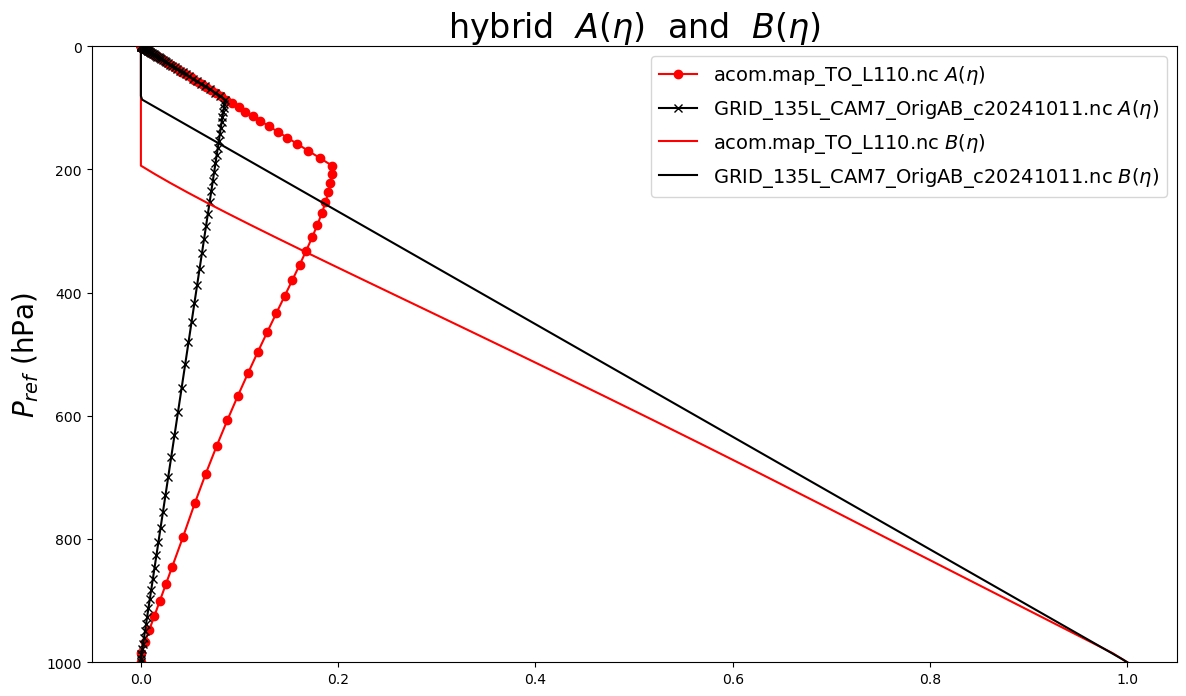

In [8]:
#plt.plot(p58,bb)
#plt.plot(p58,L58.hybi)
#plt.plot(p58,aa)

fig,ax=plt.subplots( 1,1 , squeeze=False, figsize=(14,8) )

ax[0,0].plot(hyai_A  , 1_000.*p_A, '-o' ,color='red'  , label=f'{A.exp} $A(\eta)$' )
ax[0,0].plot(hyai_B , 1_000.*p_B ,'-x', color='black' , label=f'{B.exp} $A(\eta)$'  )
ax[0,0].plot(hybi_A  , 1_000.*p_A ,color='red' , label =f'{A.exp} $B(\eta)$' )
ax[0,0].plot(hybi_B , 1_000.*p_B, color='black' , label =f'{B.exp} $B(\eta)$'  )


plt.ylim( (1000.,0.) )
plt.legend(fontsize=14)
plt.ylabel( "$P_{ref}$ (hPa)" ,fontsize=20)
plt.title( "$\mathrm{hybrid}~~A(\eta)~~\mathrm{and}~~B(\eta)$", fontsize=24 )

Text(0.5, 1.0, '$\\Delta z~\\mathrm{over}~ P_{sfc}=1000 \\mathrm{hPa}$')

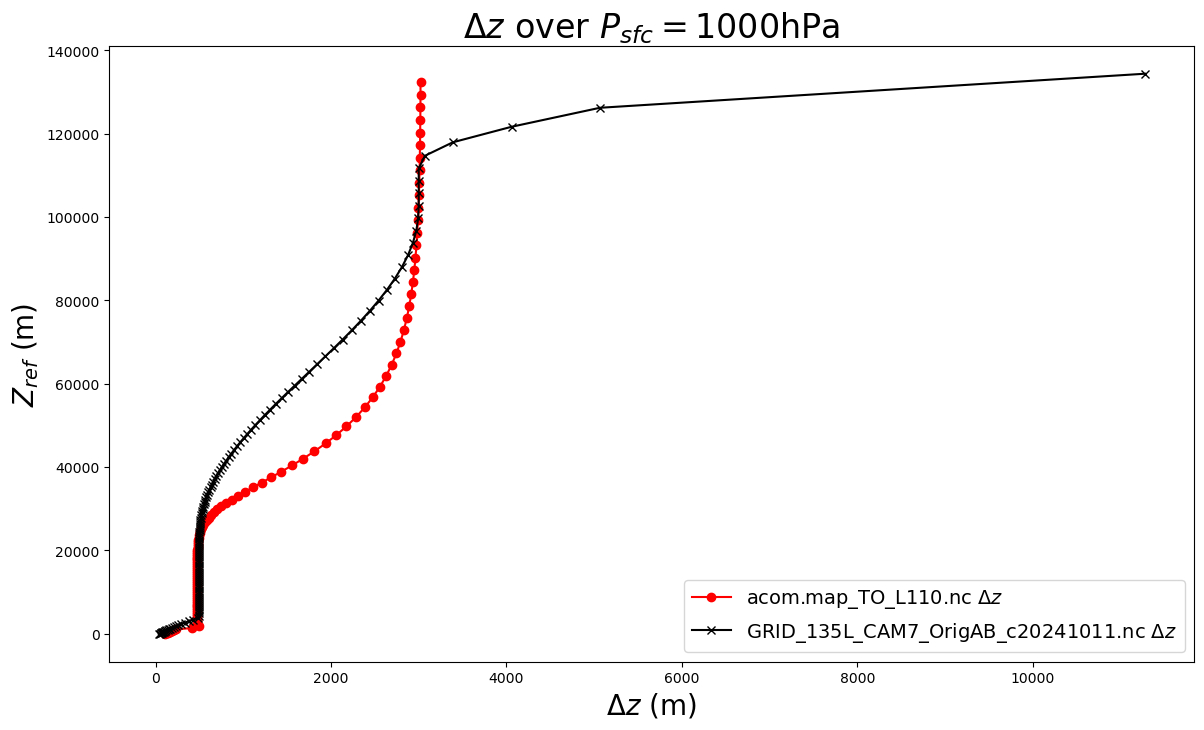

In [9]:
psfc = 1_000.
pp_A = 1_000. * hyai_A   + psfc * hybi_A
pp_B = 1_000. * hyai_B   + psfc * hybi_B
z_A = -7_000. * np.log( pp_A/1_000. )
z_B = -7_000. * np.log( pp_B/1_000. )

dz_A = -( z_A[1:]-z_A[0:-1]  )
dz_B = -( z_B[1:]-z_B[0:-1] )
zo_A = 0.5*( z_A[1:]+z_A[0:-1]  )
zo_B = 0.5*( z_B[1:]+z_B[0:-1] )



fig,ax=plt.subplots( 1,1, squeeze=False, figsize=(14,8) )

ax[0,0].plot(dz_A , zo_A  , 'o-' ,color='red' , label =f'{A.exp} $\Delta z$' )
ax[0,0].plot(dz_B , zo_B ,  'x-' ,color='black' , label =f'{B.exp} $\Delta z$'  )


#plt.ylim( (1000.,0.) )
plt.legend(fontsize=14)
plt.ylabel( "$Z_{ref}$ (m)" ,fontsize=20)
plt.xlabel( "$\Delta z$ (m)" ,fontsize=20)

plt.title( "$\Delta z~\mathrm{over}~ P_{sfc}=1000 \mathrm{hPa}$", fontsize=24 )

In [ ]:
psfc = 1_000.
#psfc=450.
pp_A = 1_000. * hyai_A   + psfc * hybi_A
pp_B = 1_000. * hyai_B   + psfc * hybi_B
z_A = -7_000. * np.log( pp_A/1_000. )
z_B = -7_000. * np.log( pp_B/1_000. )

dz_A = -( z_A[1:]-z_A[0:-1]  )
dz_B = -( z_B[1:]-z_B[0:-1] )
zo_A = 0.5*( z_A[1:]+z_A[0:-1]  )
zo_B = 0.5*( z_B[1:]+z_B[0:-1] )



fig,ax=plt.subplots( 1,1, squeeze=False, figsize=(14,8) )

ax[0,0].plot(dz_A , zo_A  , 'o-' ,color='red' , label =f'{A.exp} $\delta z$' )
ax[0,0].plot(dz_B , zo_B ,  'x-' ,color='black' , label =f'{B.exp} $\delta z$'  )


plt.ylim( (0.,20000.) )
plt.xlim( (0.,700.))
plt.legend(fontsize=14)
plt.ylabel( "$Z_{ref}$ (m)" ,fontsize=20)
plt.xlabel( "$\Delta z$ (m)" ,fontsize=20)
plt.title( "$\Delta z~\mathrm{over}~ P_{sfc}=$"+ str(psfc)+"$\mathrm{hPa}$", fontsize=24 )

In [ ]:
print( zo_B[15] , zo_A[0] )

In [ ]:
psfc = 400.
pp_A = 1_000. * hyai_A   + psfc * hybi_A
pp_B = 1_000. * hyai_B   + psfc * hybi_B
z_A = -7_000. * np.log( pp_A/1_000. )
z_B = -7_000. * np.log( pp_B/1_000. )

dz_A = -( z_A[1:]-z_A[0:-1]  )
dz_B = -( z_B[1:]-z_B[0:-1] )
zo_A = 0.5*( z_A[1:]+z_A[0:-1]  )
zo_B = 0.5*( z_B[1:]+z_B[0:-1] )



fig,ax=plt.subplots( 1,1, squeeze=False, figsize=(14,8) )

ax[0,0].plot(dz_A , zo_A  , 'o-' ,color='red' , label =f'{A.exp} $B(\eta)$' )
ax[0,0].plot(dz_B , zo_B ,  'x-' ,color='black' , label =f'{B.exp} $B(\eta)$'  )


plt.ylim( (0.,20_000.) )
plt.xlim( (0.,1_000.) )
plt.legend(fontsize=14)
plt.ylabel( "$P_{ref}$ (hPa)" ,fontsize=20)
plt.title( "$\delta z~\mathrm{over}~ P_{sfc}=400 \mathrm{hPa}$", fontsize=24 )

In [ ]:
psfc = 1_000.
pp_A = 1_000. * hyai_A   + psfc * hybi_A
pp_B = 1_000. * hyai_B   + psfc * hybi_B
z_A = -7_000. * np.log( pp_A/1_000. )
z_B = -7_000. * np.log( pp_B/1_000. )

dz_A = -( z_A[1:]-z_A[0:-1]  )
dz_B = -( z_B[1:]-z_B[0:-1] )
zo_A = 0.5*( z_A[1:]+z_A[0:-1]  )
zo_B = 0.5*( z_B[1:]+z_B[0:-1] )



fig,ax=plt.subplots( 1,1, squeeze=False, figsize=(14,8) )

ax[0,0].plot(dz_A , zo_A  , 'o-' ,color='red' , label =f'{A.exp} $B(\eta)$' )
ax[0,0].plot(dz_B , zo_B ,  'x-' ,color='black' , label =f'{B.exp} $B(\eta)$'  )


plt.ylim( (0.,40_000.) )
plt.xlim( (0.,1_000.) )
plt.legend(fontsize=14)
plt.ylabel( "$P_{ref}$ (hPa)" ,fontsize=20)
plt.title( "$\delta z~\mathrm{over}~ P_{sfc}=1000 \mathrm{hPa}$", fontsize=24 )